In [40]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn import datasets

DataFrame = pd.DataFrame

iris_raw = datasets.load_iris()

iris_raw.keys()

dict_keys(['feature_names', 'DESCR', 'target_names', 'target', 'data'])

# Loading a dataset into a pandas DataFrame


In [3]:
iris_data = DataFrame(
    iris_raw.data,
    columns=iris_raw.feature_names,
    index=pd.Index(
        [i for i in range(iris_raw.data.shape[0])]
    )
).join(
    DataFrame(
        iris_raw.target,
        columns=pd.Index(["species"]),
        index=pd.Index(
            [i for i in range(iris_raw.target.shape[0])]
        )
    )
)

iris_data[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# DataFrame stats and counts

In [4]:
# DataFrame info
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 12.0 KB


In [24]:
# Data shape (samples, features)
iris_data.shape

(150, 5)

In [12]:
# Value counts for specified field
iris_data['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

# Calculated Feature Relationships

In [67]:
# How to create a new feature on the DataFrame which is a calculated from other features
# ex. Create a boolean feature to determine whether a petal is considered large (over
# arbitrary threshold of 4 in this case )

long_petals = np.where(iris_data['petal length (cm)'] > 4, True, False)
iris_data['is_long_petal'] = long_petals
iris_data[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_long,is_long_petal
0,5.1,3.5,1.4,0.2,0,False,False
1,4.9,3.0,1.4,0.2,0,False,False
2,4.7,3.2,1.3,0.2,0,False,False
3,4.6,3.1,1.5,0.2,0,False,False
4,5.0,3.6,1.4,0.2,0,False,False


In [130]:
# How to aggregate the counts of one feature in relationship to another
# ex. How to determine how many samples from each species contain 'long petals'?
# How are 'long petals' distributed across species?

by_species_long_petals = iris_data.groupby(['species', 'is_long_petal'])
agg_counts = by_species_long_petals.size().unstack().fillna(0)
agg_counts

is_long_petal,False,True
species,,
0,50.0,0.0
1,16.0,34.0
2,0.0,50.0


In [138]:
# sort by species with the least 'long petals'
indexer = agg_counts[False].argsort()
agg_counts.take(indexer)

is_long_petal,False,True
species,,
2,0.0,50.0
1,16.0,34.0
0,50.0,0.0


# Plots

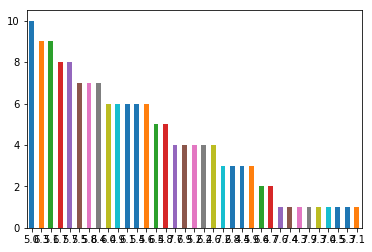

In [22]:
# Plotting value counts in a bar graph
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
iris_data['sepal length (cm)'].value_counts().plot(
    kind='bar',
    rot=0
)